## Time shifting

- 시간의 차 (Time Lag) 분석 필요
  - ex) 30일 전에 비해 주가는 상승세인가?

- Pandas내 Time shifting 기능으로 time window를 기준으로 기간간 차이 분석

### data 불러오기

In [2]:
import pandas as pd
import os

In [3]:
DATA_DIR = '../datas/'
TRAIN_PATH = os.path.join(DATA_DIR, 'train.csv')

In [16]:
df = pd.read_csv(TRAIN_PATH)
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [17]:
df['datetime'] = pd.to_datetime(df['datetime'])
df.dtypes

datetime      datetime64[ns]
season                 int64
holiday                int64
workingday             int64
weather                int64
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
casual                 int64
registered             int64
count                  int64
dtype: object

In [20]:
df = df.set_index('datetime')
df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [25]:
df['month'] = df.index.month
df['year'] = df.index.year
df['dayofweek'] = df.index.dayofweek

In [31]:
df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,year,dayofweek
datetime,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,1,2011,5
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,2011,5
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,1,2011,5
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,1,2011,5
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,1,2011,5


In [33]:
period = pd.date_range(start='2011-01-01', end='2012-01-30', freq='M')

In [35]:
df['count'].resample('M').sum()[period]

2011-01-31    23552
2011-02-28    32844
2011-03-31    38735
2011-04-30    50517
2011-05-31    79713
2011-06-30    89776
2011-07-31    92848
2011-08-31    83296
2011-09-30    79104
2011-10-31    79522
2011-11-30    70889
2011-12-31    61183
Freq: M, Name: count, dtype: int64

In [36]:
df['count'].resample('M').mean()[period]

2011-01-31     54.645012
2011-02-28     73.641256
2011-03-31     86.849776
2011-04-30    111.026374
2011-05-31    174.809211
2011-06-30    196.877193
2011-07-31    203.614035
2011-08-31    182.666667
2011-09-30    174.622517
2011-10-31    174.773626
2011-11-30    155.458333
2011-12-31    134.173246
Freq: M, Name: count, dtype: float64

## Time shift

In [38]:
# 월별 자전거 대여량 평균
monthly_avg = df['count'].resample('M').mean()
monthly_avg

datetime
2011-01-31     54.645012
2011-02-28     73.641256
2011-03-31     86.849776
2011-04-30    111.026374
2011-05-31    174.809211
2011-06-30    196.877193
2011-07-31    203.614035
2011-08-31    182.666667
2011-09-30    174.622517
2011-10-31    174.773626
2011-11-30    155.458333
2011-12-31    134.173246
2012-01-31    124.353201
2012-02-29    145.646154
2012-03-31    208.276923
2012-04-30    257.455947
2012-05-31    264.109649
2012-06-30    287.186404
2012-07-31    267.037281
2012-08-31    285.570175
2012-09-30    292.598684
2012-10-31    280.508772
2012-11-30    231.980220
2012-12-31    217.054825
Freq: M, Name: count, dtype: float64

In [40]:
# 두달씩 밀려남
monthly_avg.shift(periods=2, fill_value=0)

datetime
2011-01-31      0.000000
2011-02-28      0.000000
2011-03-31     54.645012
2011-04-30     73.641256
2011-05-31     86.849776
2011-06-30    111.026374
2011-07-31    174.809211
2011-08-31    196.877193
2011-09-30    203.614035
2011-10-31    182.666667
2011-11-30    174.622517
2011-12-31    174.773626
2012-01-31    155.458333
2012-02-29    134.173246
2012-03-31    124.353201
2012-04-30    145.646154
2012-05-31    208.276923
2012-06-30    257.455947
2012-07-31    264.109649
2012-08-31    287.186404
2012-09-30    267.037281
2012-10-31    285.570175
2012-11-30    292.598684
2012-12-31    280.508772
Freq: M, Name: count, dtype: float64

#### time shifting을 이용한 일반적인 분석 방법
- for loop을 사용해서 list에 append
- list를 concat

In [47]:
result = []
result.append(monthly_avg)
for period in range(1, 6):
    temp_avg = monthly_avg.shift(periods=period, fill_value=0)
    temp_avg = temp_avg.rename("{}_monthly_shift".format(period))
    result.append(temp_avg)

In [48]:
pd.concat(result, axis=1)

,count,1_monthly_shift,2_monthly_shift,3_monthly_shift,4_monthly_shift,5_monthly_shift
datetime,,,,,,
2011-01-31,54.645012,0.000000,0.000000,0.000000,0.000000,0.000000
2011-02-28,73.641256,54.645012,0.000000,0.000000,0.000000,0.000000
2011-03-31,86.849776,73.641256,54.645012,0.000000,0.000000,0.000000
2011-04-30,111.026374,86.849776,73.641256,54.645012,0.000000,0.000000
2011-05-31,174.809211,111.026374,86.849776,73.641256,54.645012,0.000000
2011-06-30,196.877193,174.809211,111.026374,86.849776,73.641256,54.645012
2011-07-31,203.614035,196.877193,174.809211,111.026374,86.849776,73.641256
2011-08-31,182.666667,203.614035,196.877193,174.809211,111.026374,86.849776
2011-09-30,174.622517,182.666667,203.614035,196.877193,174.809211,111.026374


## Moving Agerage

- 시계열 데이터는 노이즈 발생

-> 노이즈를 줄이면서 추세보기, 이동평균법

<Axes: xlabel='datetime'>

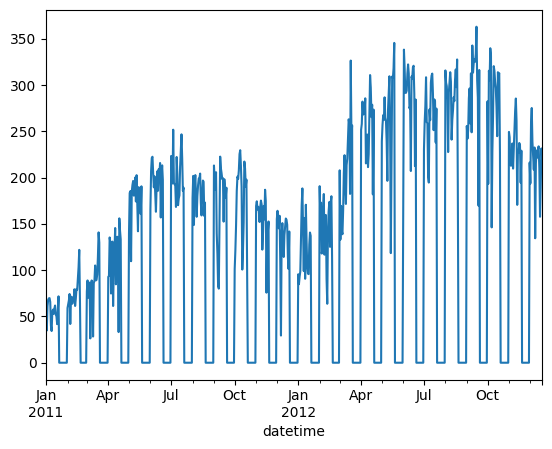

In [56]:
day_avg = df['count'].resample("D").mean().fillna(0)
day_avg.plot()


<Axes: xlabel='datetime'>

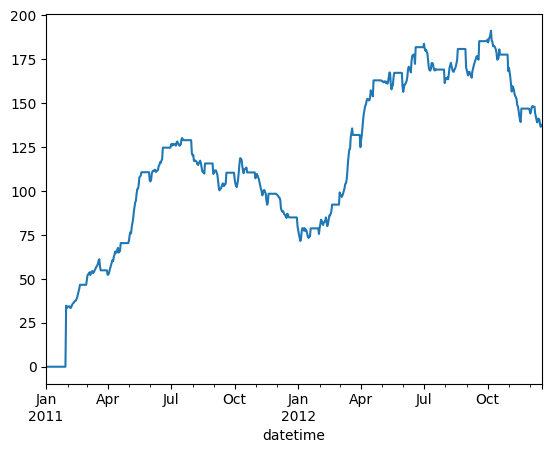

In [67]:
day_avg.rolling(window=30).mean().fillna(0).plot()

<Axes: xlabel='datetime'>

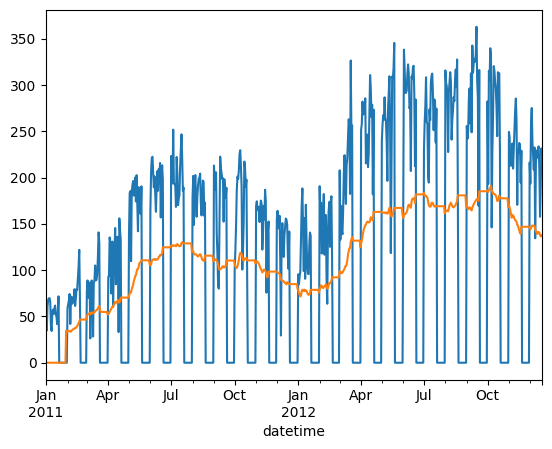

In [68]:
day_avg.plot()
day_avg.rolling(window=30).mean().fillna(0).plot()

#### rolling example

- rolling.mean()은 이동평균을 구해줌.
- 창의 크기보다 데이터가 적다면 NaN 값을 반환

In [63]:
df_mean = pd.DataFrame({'value': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [64]:
df_mean

,value
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9
9,10


In [69]:
# 3번 인덱스까지는 데이터의 수가 모자라 NaN값을 반환
# 4번 인덱스는 1,2,3,4,5의 평균인 3을 반환
df_mean.rolling(window=5).mean()

,value
0,NaN
1,NaN
2,NaN
3,NaN
4,3.0
5,4.0
6,5.0
7,6.0
8,7.0
9,8.0


## Cumsum

- 시계열 데이터를 window 마다 합침
- rolling(window = 10).sum()과 다름

In [72]:
monthly_avg = df['count'].resample('M').mean()
cumsum_avg = df['count'].resample('M').mean().cumsum()

<Axes: xlabel='datetime'>

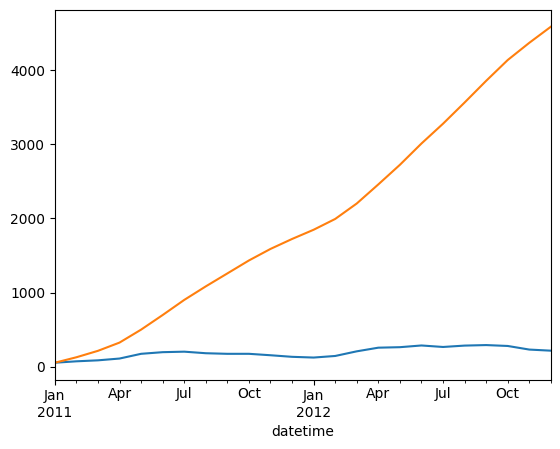

In [76]:
monthly_avg.plot()
cumsum_avg.plot()

- 위의 그래프처럼 한번에 나타내는 방법도 있지만, 하나의 데이터는 너무 크고 하나는 너무 작은 문제가 발생

In [81]:
monthly_avg.rename("Monthly_average", inplace=True)
cumsum_avg.rename("Cumsom_average", inplace=True)
df_monthly = pd.concat([monthly_avg, cumsum_avg], axis=1)
df_monthly.head()

,Monthly_average,Cumsom_average
datetime,,
2011-01-31,54.645012,54.645012
2011-02-28,73.641256,128.286267
2011-03-31,86.849776,215.136043
2011-04-30,111.026374,326.162417
2011-05-31,174.809211,500.971627


#### 하나의 그래프에서 월별 평균값과 누적 평균값 동시에 확인하기

- df_monthly.plot(y='Monthly_average', use_index=True)는 df_monthly 데이터프레임에서 Monthly_average 열의 값을 y축으로 사용하여 선 그래프를 만듦. use_index=True 옵션은 데이터프레임의 인덱스를 x축으로 사용한다는 의미.

- df_monthly.plot(y='Cumsom_average', secondary_y=True, ax=ax)는 Cumsom_average 열의 값을 y축으로 사용하여 선 그래프를 만듦. secondary_y=True 옵션은 이 그래프를 오른쪽 y축에 배치한다는 의미. ax=ax 옵션으로 첫번째 그래프와 같은 축을 사용함.

<Axes: >

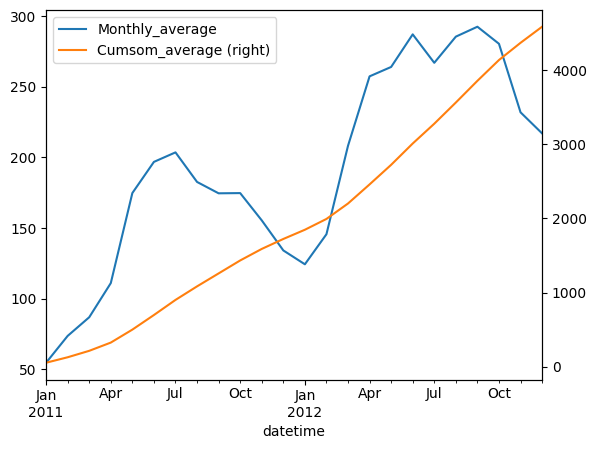

In [85]:
ax = df_monthly.plot(y='Monthly_average', use_index=True)
df_monthly.plot(y='Cumsom_average', secondary_y=True, ax=ax)